
<font size="5">Introduction to Geo-Spatial Analysis and Visualisation Notebook</font>

Worked on by Ilia Raiszadeh following instructions that can be found at https://aeturrell.github.io/coding-for-economists/geo-intro.html

We start with the basics of geospatial analysis with code, using geopandas, the "go-to package for vector spatial analysis" in Python

In [205]:
# download the needed packages into the notebook
# I had downloaded them all onto my computer using conda but the notebook wasn't recognizing them
# Found a reference on using packages in notebooks that helped me figure out how to use them here:
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

import sys
!{sys.executable} -m pip install --user numpy
!{sys.executable} -m pip install --user matplotlib
!{sys.executable} -m pip install --user pandas
!{sys.executable} -m pip install --user geopandas
!{sys.executable} -m pip install --user mapclassify
!{sys.executable} -m pip install --user pyarrow
!{sys.executable} -m pip install --user colorcet
!{sys.executable} -m pip install --user folium

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 102kB 4.2MB/s ta 0:00:01
     |████████████████████████████████| 133kB 17.2MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
# now we can import each of the necessary packages

import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import geopandas as gpd
from pathlib import Path

# also other miscellaneous instructions the tutorial starts with

# Set max rows displayed for readability
pd.set_option("display.max_rows", 6)
# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
# For this chapter, some bespoke settings:
plt.style.use(
    {
        "axes.autolimit_mode": "data",
        "patch.linewidth": 0.2,
        "figure.figsize": (10, 8),
        "figure.dpi": 125,
    }
)

In [7]:
#looking at the data we have access to with a few example countries (last three in alphabetical order)
df = gpd.read_file(Path("data/geo/world/ne_50m_admin_0_countries.shp"))
df.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."


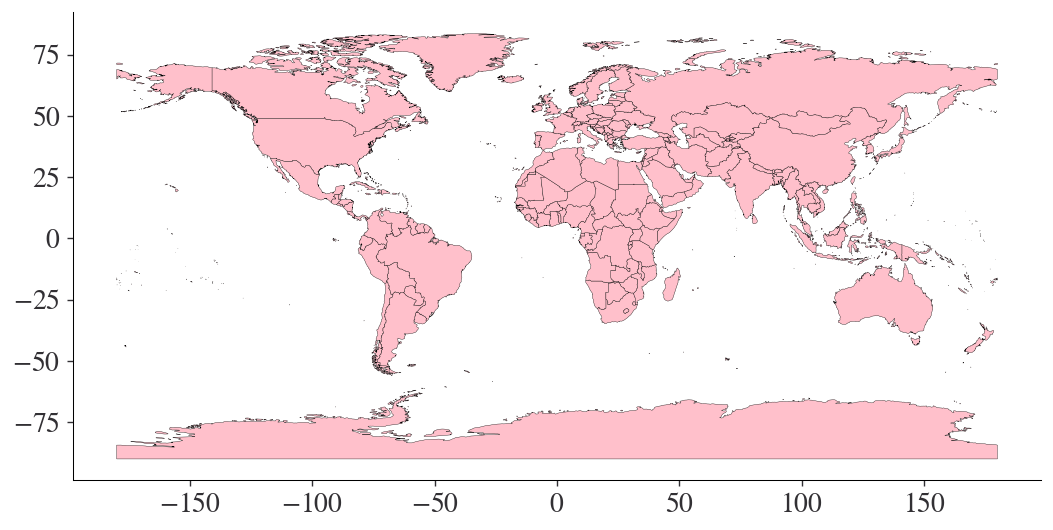

In [30]:
#plotting the data we have, there are a surprising variety of available colors
#'chartreuse' or 'burlywood' for example 
df.plot(color='pink');

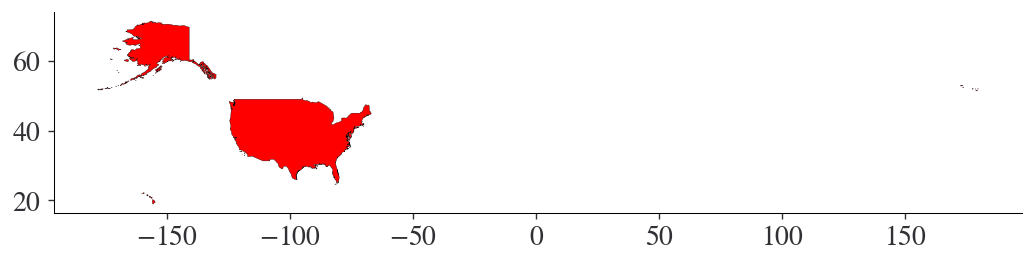

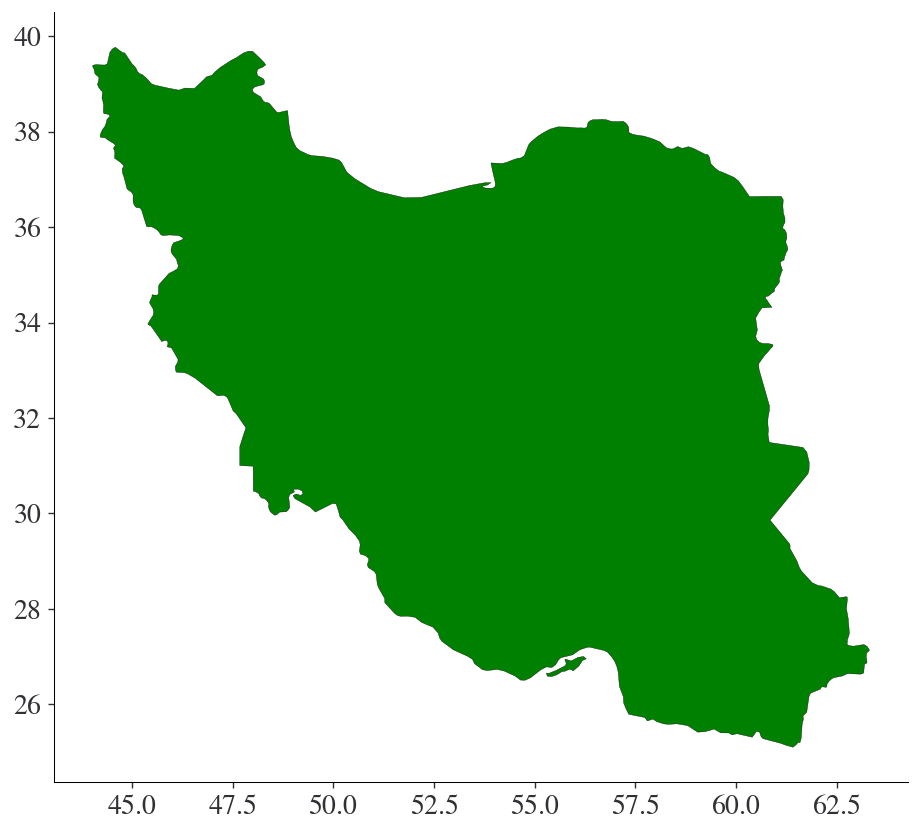

In [39]:
#we can also plot specific countries 
#this is possible with the geometry column at the end of the dataframe
df[df["ADMIN"] == "United States of America"].plot(color = 'red');
df[df["ADMIN"] == "Iran"].plot(color = 'green');

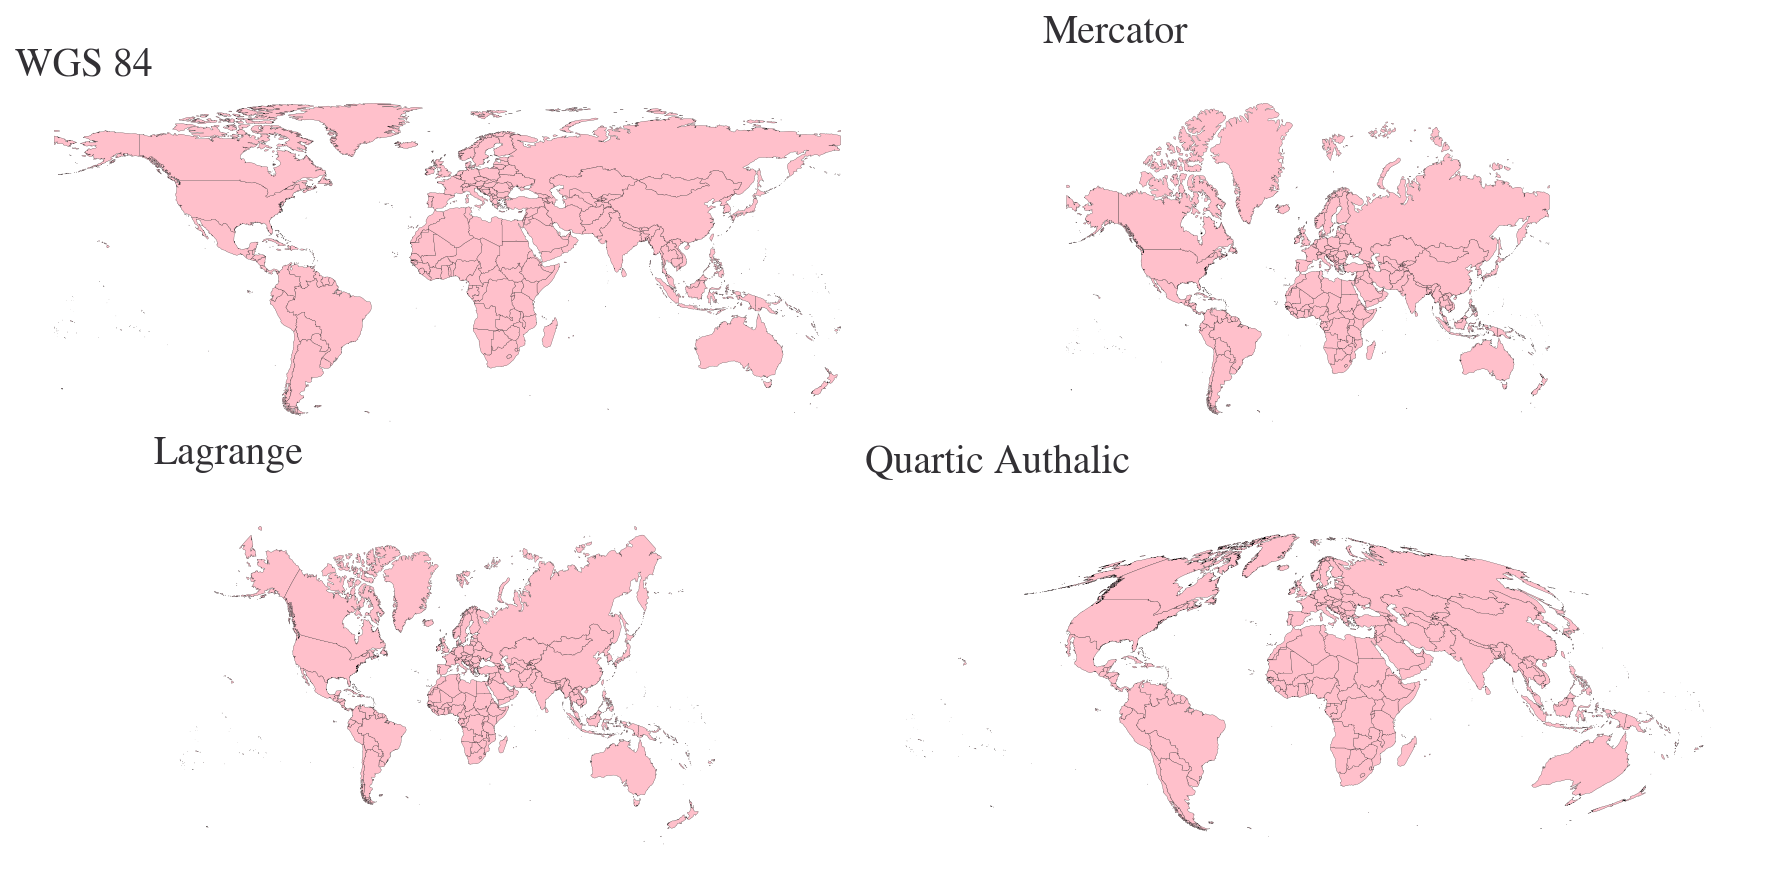

In [46]:
#The CRS (coordinate reference system) is essentially where out perspective is based from
#for a sphere (earth) this can distort the image in some ways
# list of CRS: https://proj.org/operations/projections/index.html

exclude_admins = ["Antarctica", "French Southern and Antarctic Lands"]
proj_names = ["WGS 84", "Mercator", "Lagrange", "Quartic Authalic"]
crs_names = ["EPSG:4326", "EPSG:3395", "+proj=lagrng", "+proj=qua_aut"]

world_no_antrtc = df[~df["ADMIN"].isin(exclude_admins)]

fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(12, 6), dpi=150, sharex=False, sharey=False
)
for i, ax in enumerate(axes.flat):
    world_no_antrtc.to_crs(crs_names[i]).plot(ax=ax, color="pink", linewidth=0.1)
    ax.set_title(proj_names[i])
    ax.axis("off")
plt.tight_layout()
plt.show();

In [47]:
#countries are encoded by geometric objects 
#Italy is multipolygon because of Sardinia and Sicily 
df.loc[df["ADMIN"] == "Italy", "geometry"]

137    MULTIPOLYGON (((7.02109 45.92578, 7.05576 45.9...
Name: geometry, dtype: geometry

/var/folders/t7/s39_sns94477x570lvgt_lt00000gn/T/ipykernel_24102/272328299.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["centroid"] = df.centroid


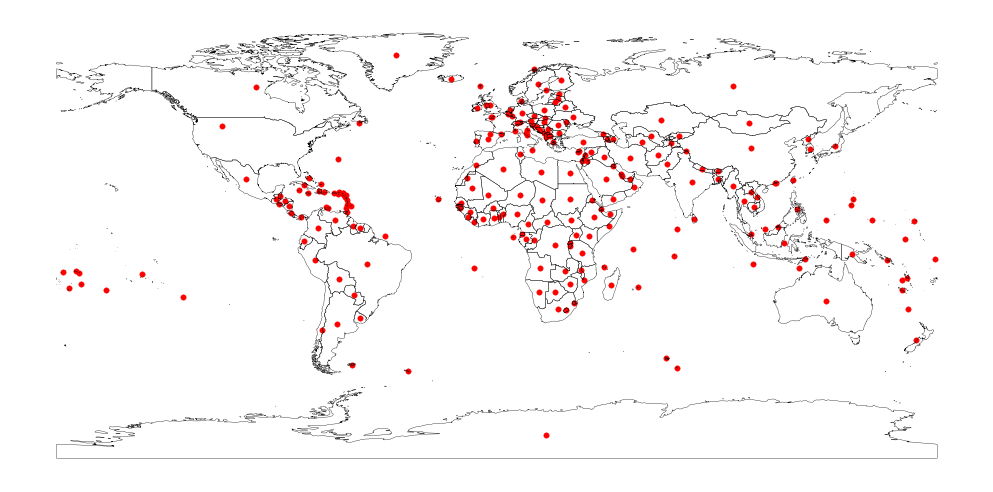

In [51]:
#we can plot point as well, in this case the spatial midpoint of each country
df["centroid"] = df.centroid

fig, ax = plt.subplots()
ax.axis("off")
df.boundary.plot(ax=ax, lw=0.2, color="k")
df["centroid"].plot(ax=ax, color="red", markersize=10)
plt.show()

Length of line is 28.57


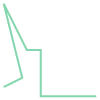

In [65]:
#working with basic building blocks like points, lines, and shapes

from shapely.geometry import Point

point = Point(1000, 1000)

from shapely.geometry import LineString

line = LineString(
    [Point(0.0, 1.0), Point(2.0, 2.0), Point(0, 10), Point(2.5, 5.0), Point(4, 5), Point(4, 0), Point(10,0)]
)
print(f"Length of line is {line.length:.2f}")
line

The area of the poly is 0.5


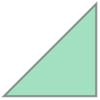

In [72]:
from shapely.geometry import Polygon

poly = Polygon([(0, 0), (1, 1), (1, 0)])
print(f"The area of the poly is {poly.area}")
poly

In [140]:
#we can see whether the spatial midpoint of a country falls within its borders

country = "Germany"
df_row = df.loc[df["ADMIN"] == country, :]
df_row["geometry"].iloc[0].contains(df_row["centroid"].iloc[0])

True

In [141]:
#I wanted to see if we could count how many countries have their centroid in their borders
#surprisingly difficult to write this function
countrylist = [] #this will hold list of strings that reference each country in dataframe
for index, row in df.iterrows():
    value = row.iloc[3] #fourth column of dataframe holds country names
    #if statement necessary because I noticed countries show up multiple times in dataframe
    if value not in countrylist: 
        countrylist.append(str(value))

centroid_counter = 0 #counter for how many countries have centroid in borders
for i in countrylist[0:198]+ countrylist[199:]:
    df_row = df.loc[df["ADMIN"] == i, :]
    if df_row["geometry"].iloc[0].contains(df_row["centroid"].iloc[0]):
        centroid_counter += 1

print(str(centroid_counter)+ ' out of ' + str(len(countrylist) - 1) + ' countries have their spatial midpoint inside of their borders.')
print("That is " + str((centroid_counter/(len(countrylist) - 1)) * 100) + '% of countries in this dataset.') 

#there was a very interesting problem I came across while working on this
#the first time I tested the for loop I was using to increment 'centroid-counter', there was an error
#At first I thought my code was somehow wrong, but after testing with a small subset of countries I realized that wasn't the case
#My next thought was that for one or more of the countries, there must be an issue with the geometry
#So after testing different ranges of the country list and eventually narrowing down that it was one of the last ten countries,
#I finally found that for Kashmir, there is no data (for any column), probably because of there dispute there
#In the end I had to iterate through every row except Kashmir's (which is why its 'for i in countrylist[0:198]+ countrylist[199:]:')    


174 out of 200 countries have their spatial midpoint inside of their borders.
That is 87.0% of countries in this dataset.


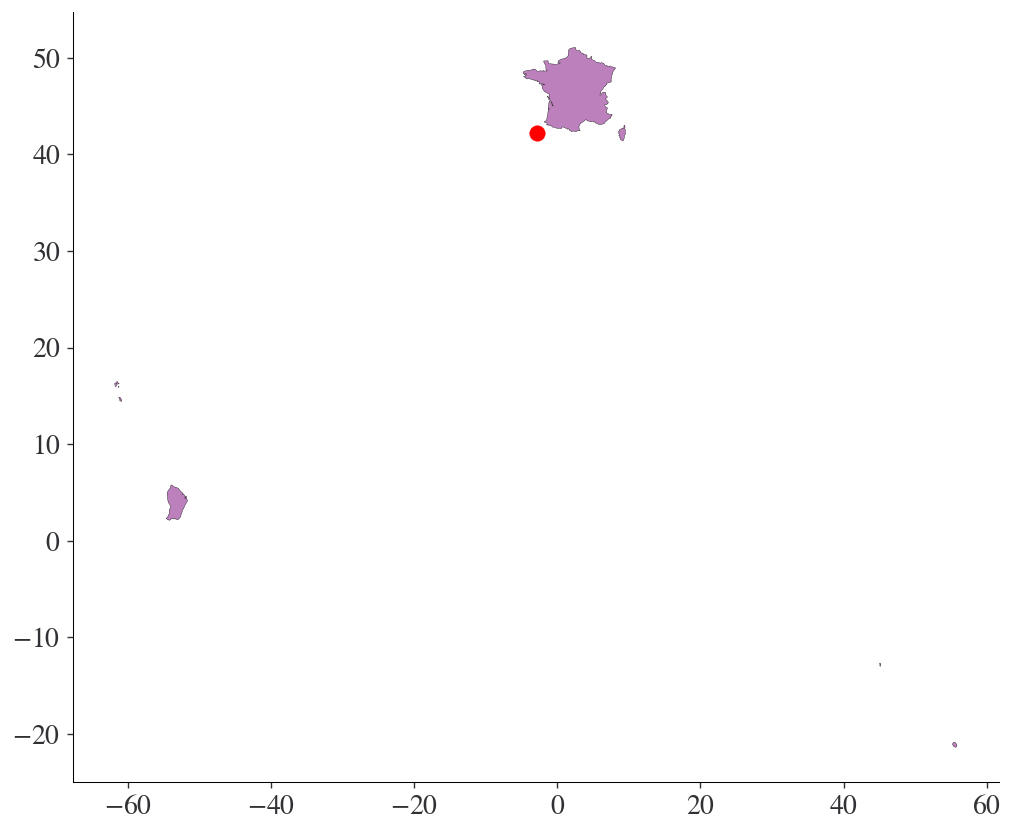

In [142]:
#we can look at a country whose centroid isn't within it borders to see why this can even be the case

fig, ax = plt.subplots()
df_row = df.loc[df["ADMIN"] == "France", :]
df_row["geometry"].plot(ax=ax)
df_row["centroid"].plot(ax=ax, color="red");

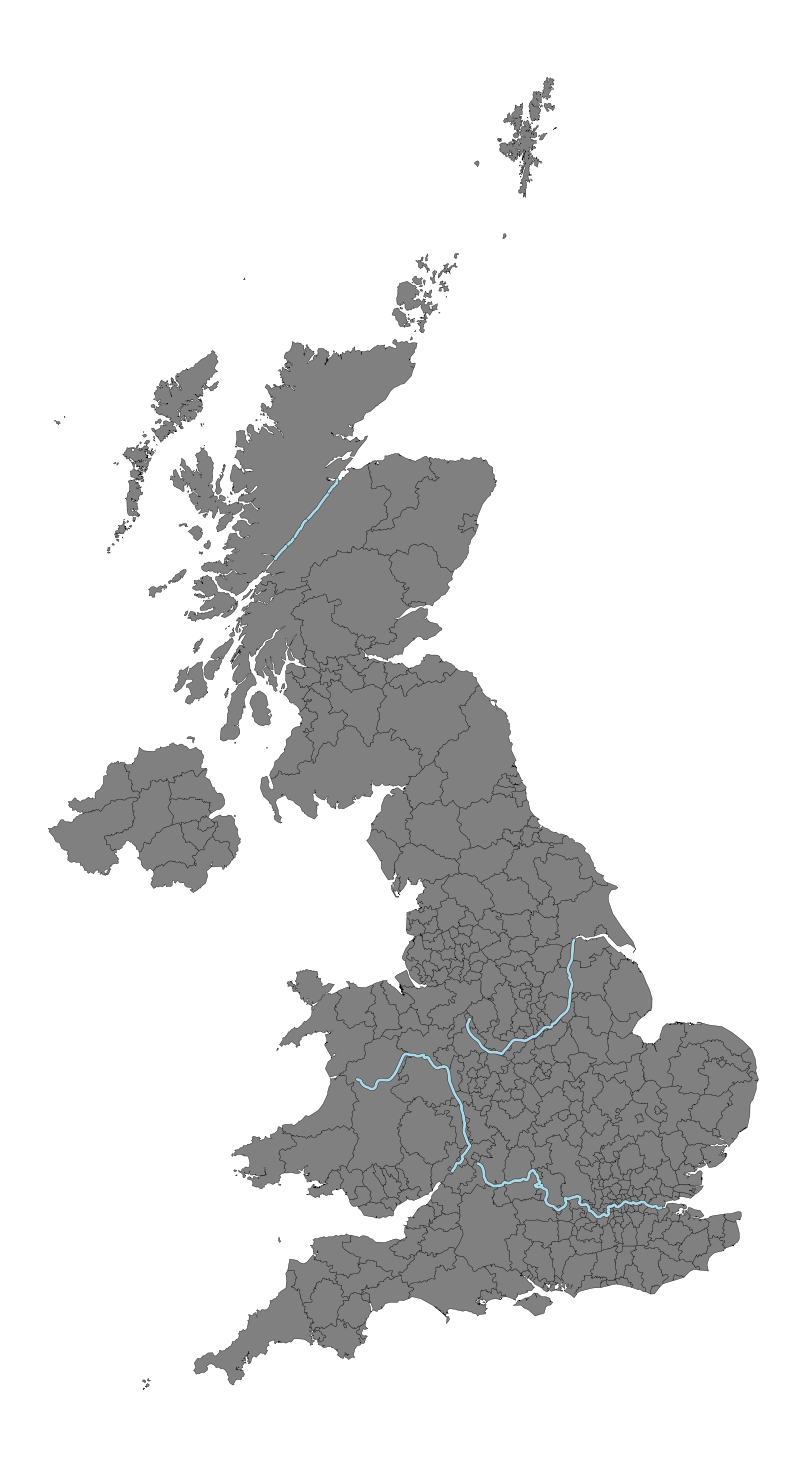

In [146]:
#now we work with set operations (with polygons) to find areas intersected by the River Trent in England

dfuk = gpd.read_file(Path("data/geo/uk_lad/Local_Authority_Districts__May_2020__UK_BUC.shp"))
river = gpd.read_file(Path("data/geo/rivers/rivers.shp"))
river = river.to_crs(dfuk.crs)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
dfuk.plot(color="grey", ax=ax)
river.buffer(1.5e3).plot(ax=ax, color="lightblue");

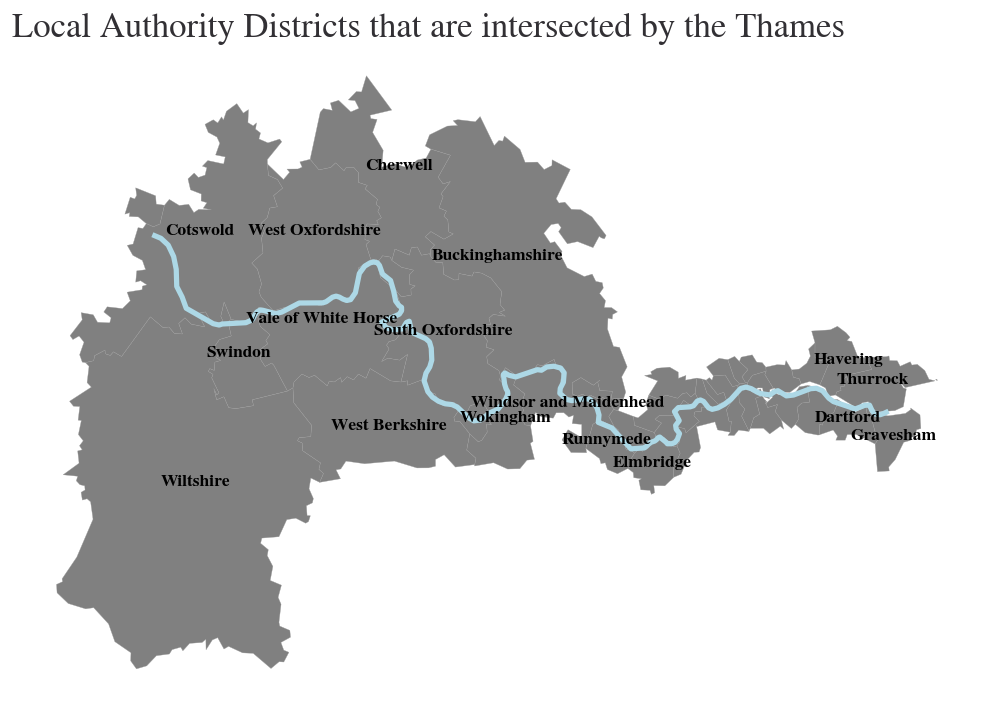

In [152]:
#we make a function that shows what districts intersect a certain river, for any input river in England

def river_intersect_plot(river_name):
    """
    Given the name of a river, shows a plot of the LADs that it intersects.
    """
    river = gpd.read_file(os.path.join("data", "geo", "rivers", "rivers.shp"))
    river = river[river["name"] == river_name]
    river = river.to_crs(dfuk.crs)
    dfuk["river"] = dfuk["geometry"].apply(
        lambda x: river["geometry"].buffer(2e3).intersects(x)
    )
    df_th = dfuk[dfuk["river"]].copy()
    df_th["coords"] = (
        df_th["geometry"].representative_point().apply(lambda x: x.coords[:][0])
    )
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    df_th.plot(color="grey", ax=ax, edgecolor="0.6")
    river.plot(color="lightblue", ax=ax)
    for idx, row in df_th.iterrows():
        if row["geometry"].area > np.quantile(df_th.area, q=0.6):
            ax.annotate(
                text=row["LAD20NM"],
                xy=row["coords"],
                horizontalalignment="center",
                weight="bold",
                fontsize=10,
                color="black",
            )
    ax.set_title(
        f"Local Authority Districts that are intersected by the {river_name}",
        loc="left",
        fontsize=20,
    )
    plt.show()

river_intersect_plot("Thames")

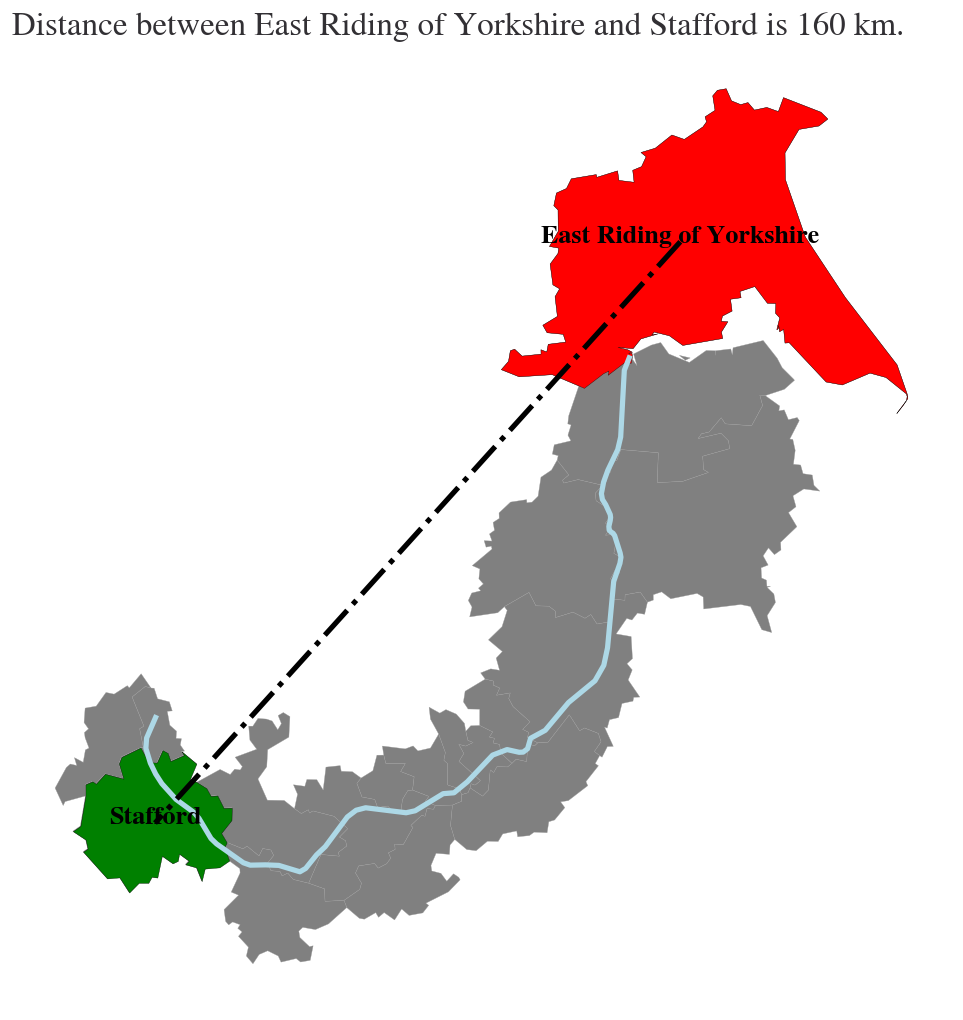

In [153]:
#computing distance between two districts:

# Get the rows we're interested in out of the dataframe:
name_a = "East Riding of Yorkshire"
name_b = "Stafford"
# This selects the *all rows* that match these conditions, which is why we have to use .iloc[0] thereafter
# to make sure we're only passing a single row.
place_a = df_th.loc[df_th["LAD20NM"] == "East Riding of Yorkshire", :]
place_b = df_th.loc[df_th["LAD20NM"] == "Stafford", :]
# Compute the distance using representative points
dist_a_b = (
    place_a["geometry"]
    .representative_point()
    .iloc[0]
    .distance(place_b["geometry"].representative_point().iloc[0])
)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
df_th.plot(color="grey", ax=ax, edgecolor="0.6")
river.plot(color="lightblue", ax=ax)
place_a.plot(ax=ax, color="red")
place_b.plot(ax=ax, color="green")
for i, place in enumerate([place_a, place_b]):
    ax.annotate(
        text=place["LAD20NM"].iloc[0],
        xy=place["coords"].iloc[0],
        horizontalalignment="center",
        weight="bold",
        fontsize=15,
        color="black",
    )
#add a connecting line
#Create a line between two rep points in a and b
connector = LineString([place_a['geometry'].representative_point().iloc[0],
                        place_b['geometry'].representative_point().iloc[0]])
gpd.GeoDataFrame([connector],columns=['line'], geometry='line').plot(ax=ax, linestyle='-.', color='black')
ax.set_title(
    f"Distance between {name_a} and {name_b} is {dist_a_b/1e3:1.0f} km.", loc="left"
)
plt.show()

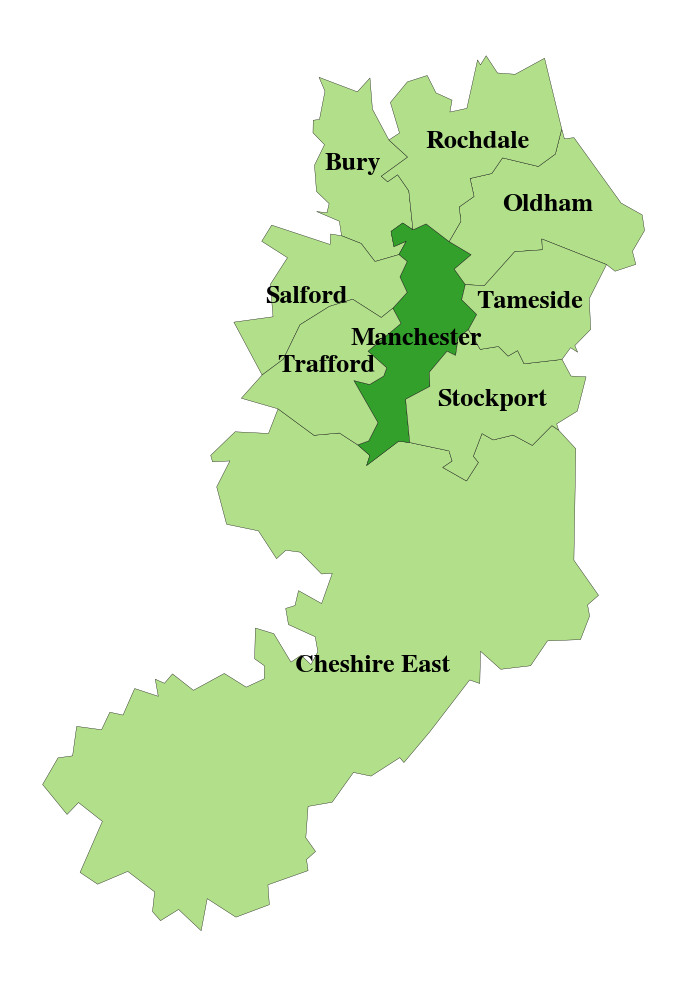

In [162]:
#now we try to make a function that tells us what districts are neighbors

# Empty list of lists
neighbours_all = [[] for _ in range(len(dfuk))]
# Iterate over rows
for index, row in dfuk.iterrows():
    # Find any touches of this row
    neighbours = dfuk.loc[dfuk["geometry"].touches(row["geometry"]), "LAD20NM"].tolist()
    # Find any overlaps of this row
    overlap = dfuk.loc[dfuk["geometry"].overlaps(row["geometry"]), "LAD20NM"].tolist()
    # Take the union of touches and overlaps
    neighbours = np.union1d(neighbours, overlap)
    # Store the result
    neighbours_all[index] = neighbours

# Put result back into geopandas dataframe (RHS is a list of lists of strings)
dfuk["neighbours"] = neighbours_all

def show_neighbors(name_of_region):
    # Set colors now for ease in plotting
    dfuk["color"] = "#b2df8a"
    dfuk.loc[dfuk["LAD20NM"] == name_of_region, "color"] = "#33a02c"
    # Get representative points to use for text annotation. Note that we want xy coords, hence the fussy use of .apply
    dfuk["coords"] = dfuk["geometry"].representative_point().apply(lambda x: x.coords[:][0])
    # Get a list of the neighbours--again, this comes out as a dataframe row so we need to call iloc[0] to get first entry
    names_neighbours = list(
        dfuk.loc[dfuk["LAD20NM"] == name_of_region, "neighbours"].iloc[0]
    )
    # Cut to only those areas of interest
    df_cut = dfuk.loc[dfuk["LAD20NM"].isin(names_neighbours + [name_of_region])]

    fig, ax = plt.subplots(figsize=(10, 10))
    df_cut.plot(ax=ax, color=df_cut["color"], edgecolor="k")
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    # Add annotation
    for idx, row in df_cut.iterrows():
        ax.annotate(
            text=row["LAD20NM"],
            xy=row["coords"],
            horizontalalignment="center",
            weight="bold",
            fontsize=15,
            color="black",
        )
    plt.show()

#put any district here for it to work
show_neighbors('Manchester')

In [163]:
#install geopy for geocoding portion
!{sys.executable} -m pip install --user geopy

     |████████████████████████████████| 122kB 5.8MB/s eta 0:00:01
     |████████████████████████████████| 40kB 10.6MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [175]:
from geopy.geocoders import Nominatim

# Create a geolocator using Open Street Map (aka Nominatim)
# Use your own user agent identifier here
geolocator = Nominatim(user_agent="codeforecon")

# Pass an address to retrieve full location information:
location = geolocator.geocode("Cornell University")

location.address

#this one is pretty incredible, gives a full adress for anywhere you can imagine

'Cornell University, Town of Dryden, Tompkins County, New York, 14850, United States'

In [171]:
# We can also reverse geocode from a lat and lon:
scnd_location = geolocator.reverse("37, -95")

scnd_location.address

'Southwest 90th Street, Cherokee County, Kansas, United States'

In [177]:
#creating dataframe with boroughs of New York ourself
boros_df = gpd.GeoDataFrame(
    {"boro_name": ["Staten Island", "Queens", "Brooklyn", "Manhattan", "Bronx"]},
    index=range(5),
)
boros_df.head()
boros_df[["geometry", "address"]] = gpd.tools.geocode(boros_df.boro_name, provider="photon")
boros_df

/Users/iliaraiszadeh/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:3992: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  self[k1] = value[k2]


,boro_name,geometry,address
0,Staten Island,POINT (-74.14960 40.58346),"Staten Island, New York, New York, United States"
1,Queens,POINT (-73.82831 40.71351),"Queens, New York, New York, United States"
2,Brooklyn,POINT (-73.94972 40.65260),"Brooklyn, New York, New York, United States"
3,Manhattan,POINT (-73.95989 40.78962),"Manhattan, New York, New York, United States"
4,Bronx,POINT (-73.87859 40.84665),"The Bronx, New York, New York, United States"


<font size="5">Geo-Spatial Visualisation</font>

We now begin the next chapter here

In [184]:
#import all the packagaes we need again
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import geopandas as gpd
from pathlib import Path
import warnings

In [185]:
#some settings are needed to start as well
# Set max rows displayed for readability
pd.set_option("display.max_rows", 6)
# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
# For this page, use data limits and bigger default fig size
plt.style.use(
    {
        "axes.autolimit_mode": "data",
        "figure.figsize": (10, 8),
        "figure.dpi": 125,
        "patch.linewidth": 0.2,
    }
)
# Turn off warnings
warnings.filterwarnings('ignore')

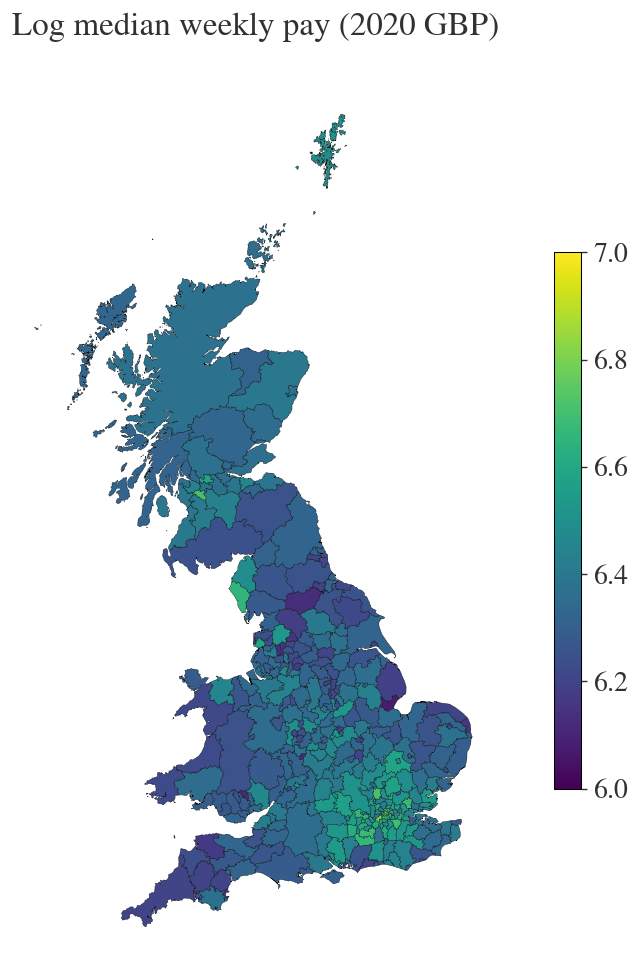

In [187]:
#we start with a basic chloropleth, a map that shows different areas in colours
#according to a statistic that represents an aggregate summary of a geographic characteristic within each area

pay = pd.read_csv("https://github.com/aeturrell/coding-for-economists/raw/main/data/geo/ashe_lad_median_pay_2020.csv")
pay = pay.rename(columns={"lad": "LAD20CD"})
df = df.merge(pay, on=["LAD20CD"], how="inner")
col = "Log median weekly pay (2020 GBP)"
df[col] = np.log(df["Median weekly pay (2020 GBP)"])

fig, ax = plt.subplots()
ax.set_title(col, loc="left")
df.plot(
    ax=ax,
    column=col,
    legend=True,
    legend_kwds={"label": "", "shrink": 0.6},
    vmin=round(df[col].min()),
    vmax=round(df[col].max()),
)
ax.axis("off")
plt.tight_layout()
plt.show();

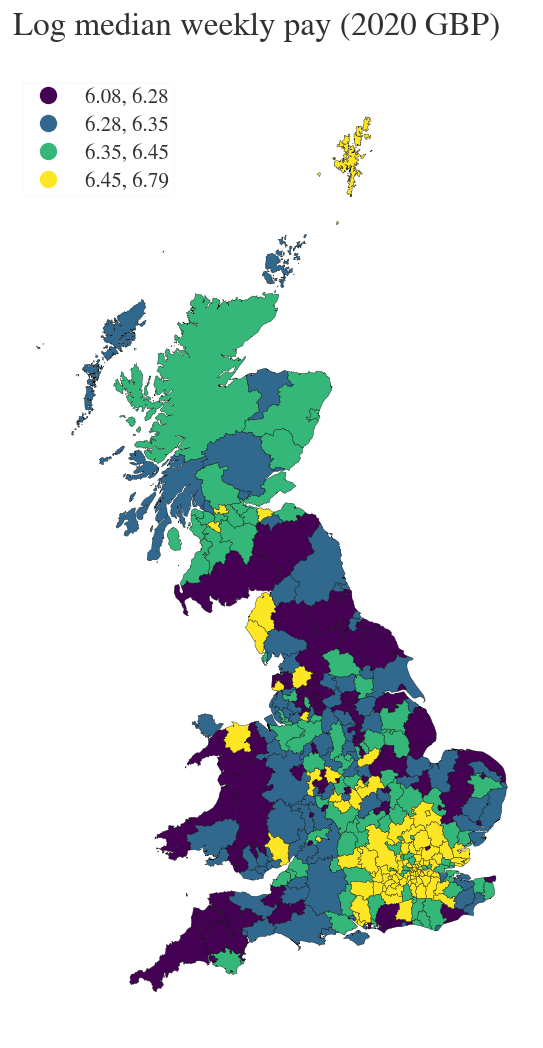

In [190]:
#we can also make chloropleths by grouping variables into distinct ranges

fig, ax = plt.subplots(figsize=(8, 10))
ax.set_title(col, loc="left")
ax.axis("off")
df.plot(ax=ax, column=col, legend=True, scheme="Quantiles", k=4, legend_kwds={"loc": 2});